In [46]:
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import load_model
from joblib import load
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, log_loss, roc_auc_score

In [47]:
df = pd.read_csv('../../data/telecom_pca.csv')
x = df.drop(columns=['TARGET'])
y = df['TARGET']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 1)

In [50]:
# load model
model = load_model('./../modeling/cnn1d_churn.h5')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 32)            64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 19, 64)            2112      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 19, 64)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 1216)              0         
                                                                 
 dropout (Dropout)           (None, 1216)              0

In [74]:
rand_forest_metrics = []
cnn1d_metrics = []

In [75]:
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

26733/26733 [==============================] - 56s 2ms/step


In [76]:
cnn1d_metrics.append(accuracy_score(y_test, y_pred)) # test accuracy
cnn1d_metrics.append(log_loss(y_test, y_pred)) #test loss 
cnn1d_metrics.append(accuracy_score(y_train, y_pred_train)) #train accuracy 
cnn1d_metrics.append(log_loss(y_train, y_pred_train))#train loss 
cnn1d_metrics.append(roc_auc_score(y_test, y_pred)) #roc auc score


In [77]:
cnn1d_metrics

[0.9472314668368689,
 1.8225605677562706,
 0.9472115943248781,
 1.823246940004379,
 0.5]

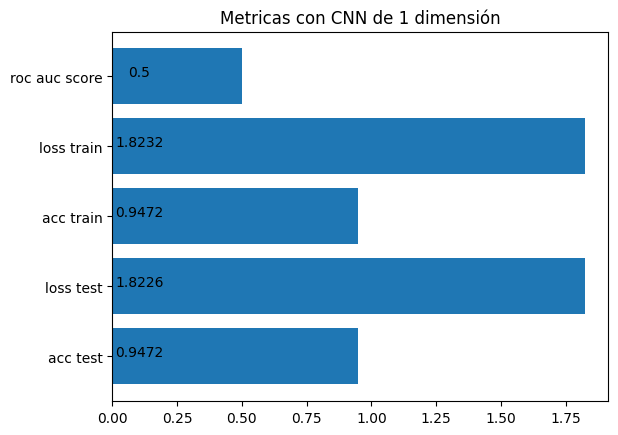

In [85]:
labels = ["acc test", "loss test", "acc train", "loss train", "roc auc score"]
plt.barh(labels,cnn1d_metrics)
for i in range (0, len(cnn1d_metrics)):
    plt.annotate(round(cnn1d_metrics[i], 4),(0.05,i), xytext = (10,0),textcoords="offset points", ha = "center")
plt.title("Metricas con CNN de 1 dimensión")
plt.show()

In [79]:
model.metrics_names[0]

'loss'

In [80]:
random_forest = load("./../modeling/random_forest_churn.joblib")

In [81]:
y_pred = random_forest.predict(x_test)
y_pred_train = random_forest.predict(x_train)

In [82]:
rand_forest_metrics.append(accuracy_score(y_test, y_pred)) # test accuracy
rand_forest_metrics.append(log_loss(y_test, y_pred)) #test loss 
rand_forest_metrics.append(accuracy_score(y_train, y_pred_train)) #train accuracy 
rand_forest_metrics.append(log_loss(y_train, y_pred_train))#train loss 
rand_forest_metrics.append(roc_auc_score(y_test, y_pred)) #roc auc score

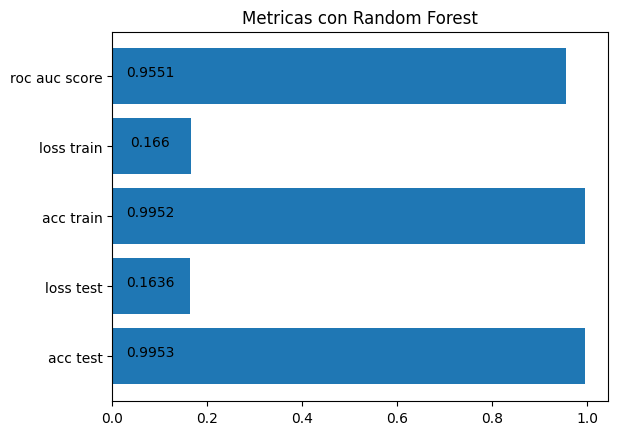

In [84]:
labels = ["acc test", "loss test", "acc train", "loss train", "roc auc score"]
plt.barh(labels,rand_forest_metrics)
for i in range (0, len(rand_forest_metrics)):
    plt.annotate(round(rand_forest_metrics[i], 4),(0.05,i), xytext = (10,0),textcoords="offset points", ha = "center")
plt.title("Metricas con Random Forest")
plt.show()